<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparations" data-toc-modified-id="Preparations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparations</a></span></li><li><span><a href="#Drell-Yan-QCD-vertex-correction" data-toc-modified-id="Drell-Yan-QCD-vertex-correction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Drell-Yan QCD vertex correction</a></span></li><li><span><a href="#$ee\rightarrow-Z\rightarrow-ff$" data-toc-modified-id="$ee\rightarrow-Z\rightarrow-ff$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>$ee\rightarrow Z\rightarrow ff$</a></span></li><li><span><a href="#$ee\rightarrow-ZH$" data-toc-modified-id="$ee\rightarrow-ZH$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>$ee\rightarrow ZH$</a></span></li></ul></div>

# Preparations

Many examples are avaliable on homepage of `pyfeyn`.
API reference for pyfeyn: https://pyfeyn.hepforge.org/doc/pyfeyn-module.html .
Sometimes you also need to read reference of `PyX` for chaning line style (e.g. line width).



In [24]:
!python -V                   # python2 is required for old version of pyx
!pip install pyx==0.12.1     # old version of pyx required for pyfeyn
!pip install pyfeyn

!pip install pathlib
!pip install pdf2image==1.0  # old version of pdf2image required for python2
!conda install -c conda-forge poppler  # required by pdf2image

from IPython.display import IFrame, display, Image
from pdf2image import convert_from_path

def show_pdf(pdffile):
    pages = convert_from_path(pdffile, 500)
    page = pages[0]    
    display(Image(page._repr_png_(), width=400, height=400))


Python 2.7.16 :: Anaconda, Inc.
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
ERROR: Invalid requirement: '#'


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
ERROR: Invalid requirement: '#'

CondaValueError: invalid package specification: #



# Drell-Yan QCD vertex correction

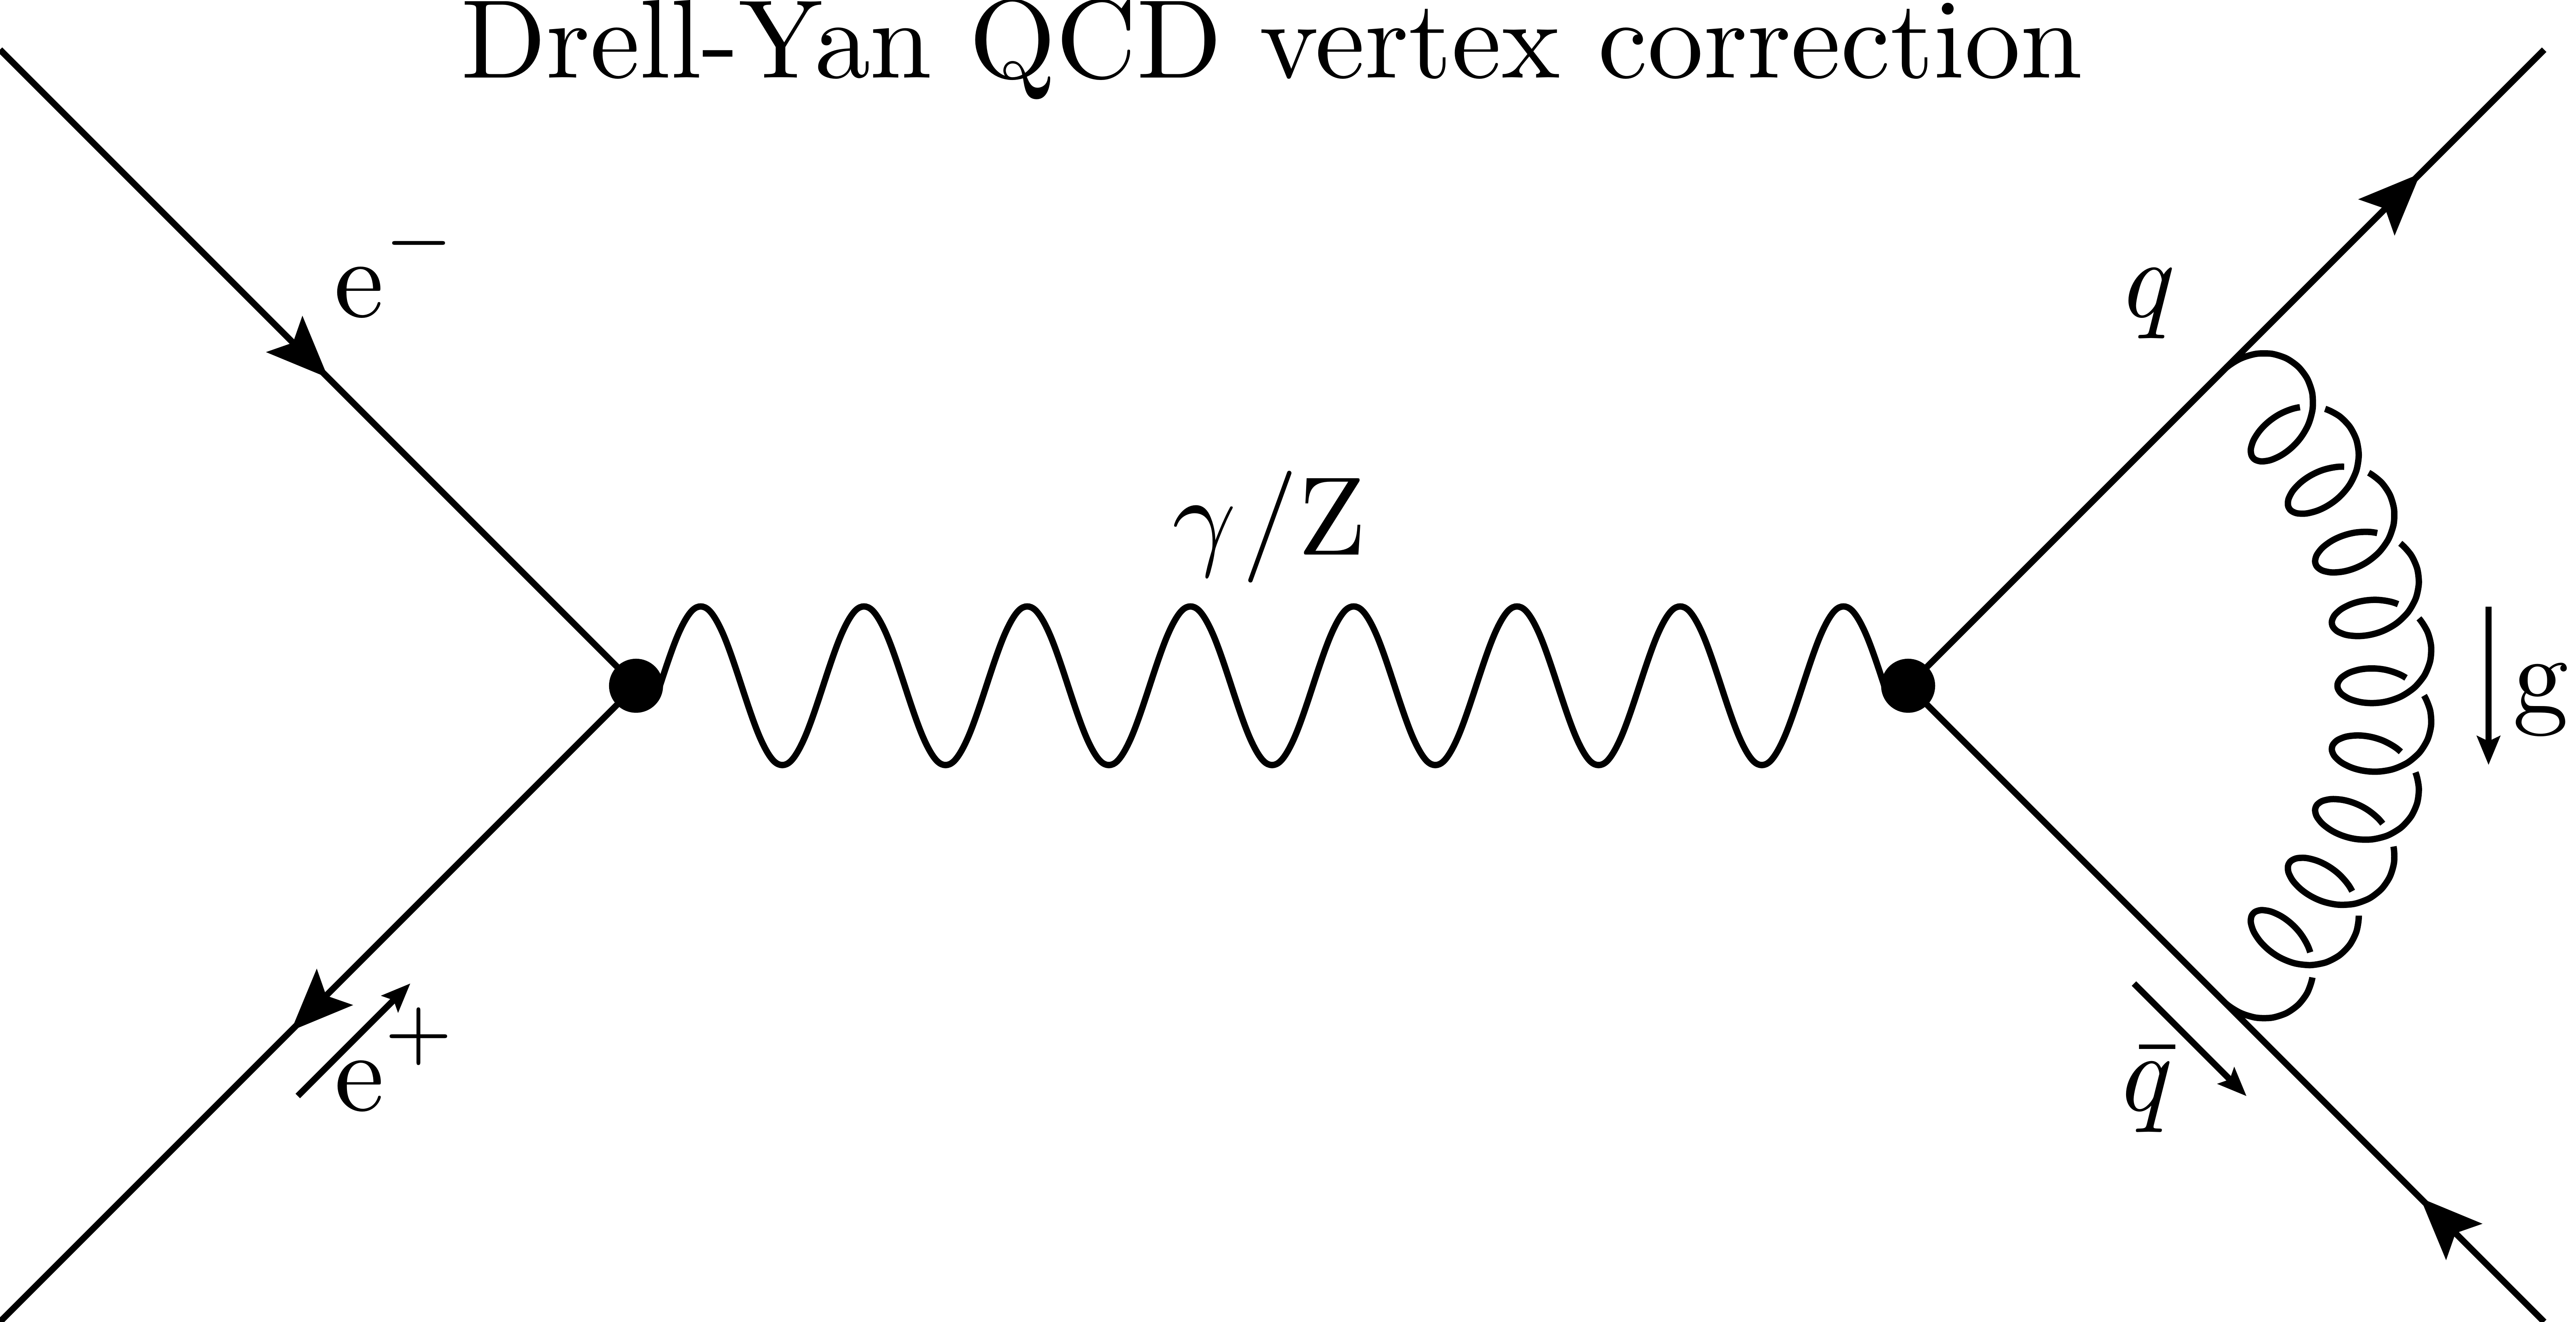

In [25]:
import pyx

from pyfeyn.user import *
from pyx import *

from IPython.display import IFrame, display, Image, display_png
from pdf2image import convert_from_path


filepath="pyfeyn-test1.pdf"


fd = FeynDiagram()

in1 = Point(-4,  2)
in2 = Point(-4, -2)
out1 = Point(4, -2)
out2 = Point(4,  2)
in_vtx = Vertex(-2, 0, mark=CIRCLE)
out_vtx = Vertex(2, 0, mark=CIRCLE)

l1 = Label("Drell-Yan QCD vertex correction", x=0, y=2)

fa1 = Fermion(in1, in_vtx).addArrow().addLabel(r"\Pelectron")
fa2 = Fermion(in_vtx, in2).addArrow().addLabel(r"\Ppositron")
fa2.addParallelArrow(size=0.1, displace=-0.06, sense=-1)
bos = Photon(in_vtx, out_vtx).addLabel(r"\Pphoton/\PZ")
fb1 = Fermion(out1, out_vtx).addArrow(0.2).addLabel(r"\APquark")
fb1.addParallelArrow(size=0.1, displace=-0.06, sense=-1)
fb2 = Fermion(out_vtx, out2).addArrow(0.8).addLabel(r"\Pquark")
glu = Gluon(midpoint(out_vtx, out1), midpoint(out_vtx, out2)).set3D()
glu.invert().bend(0.5).addLabel("\Pgluon", displace=0.35)
glu.addParallelArrow(size=0.1, displace=0.2, sense=-1)



fd.draw(filepath)
show_pdf(filepath)

# $ee\rightarrow Z\rightarrow ff$

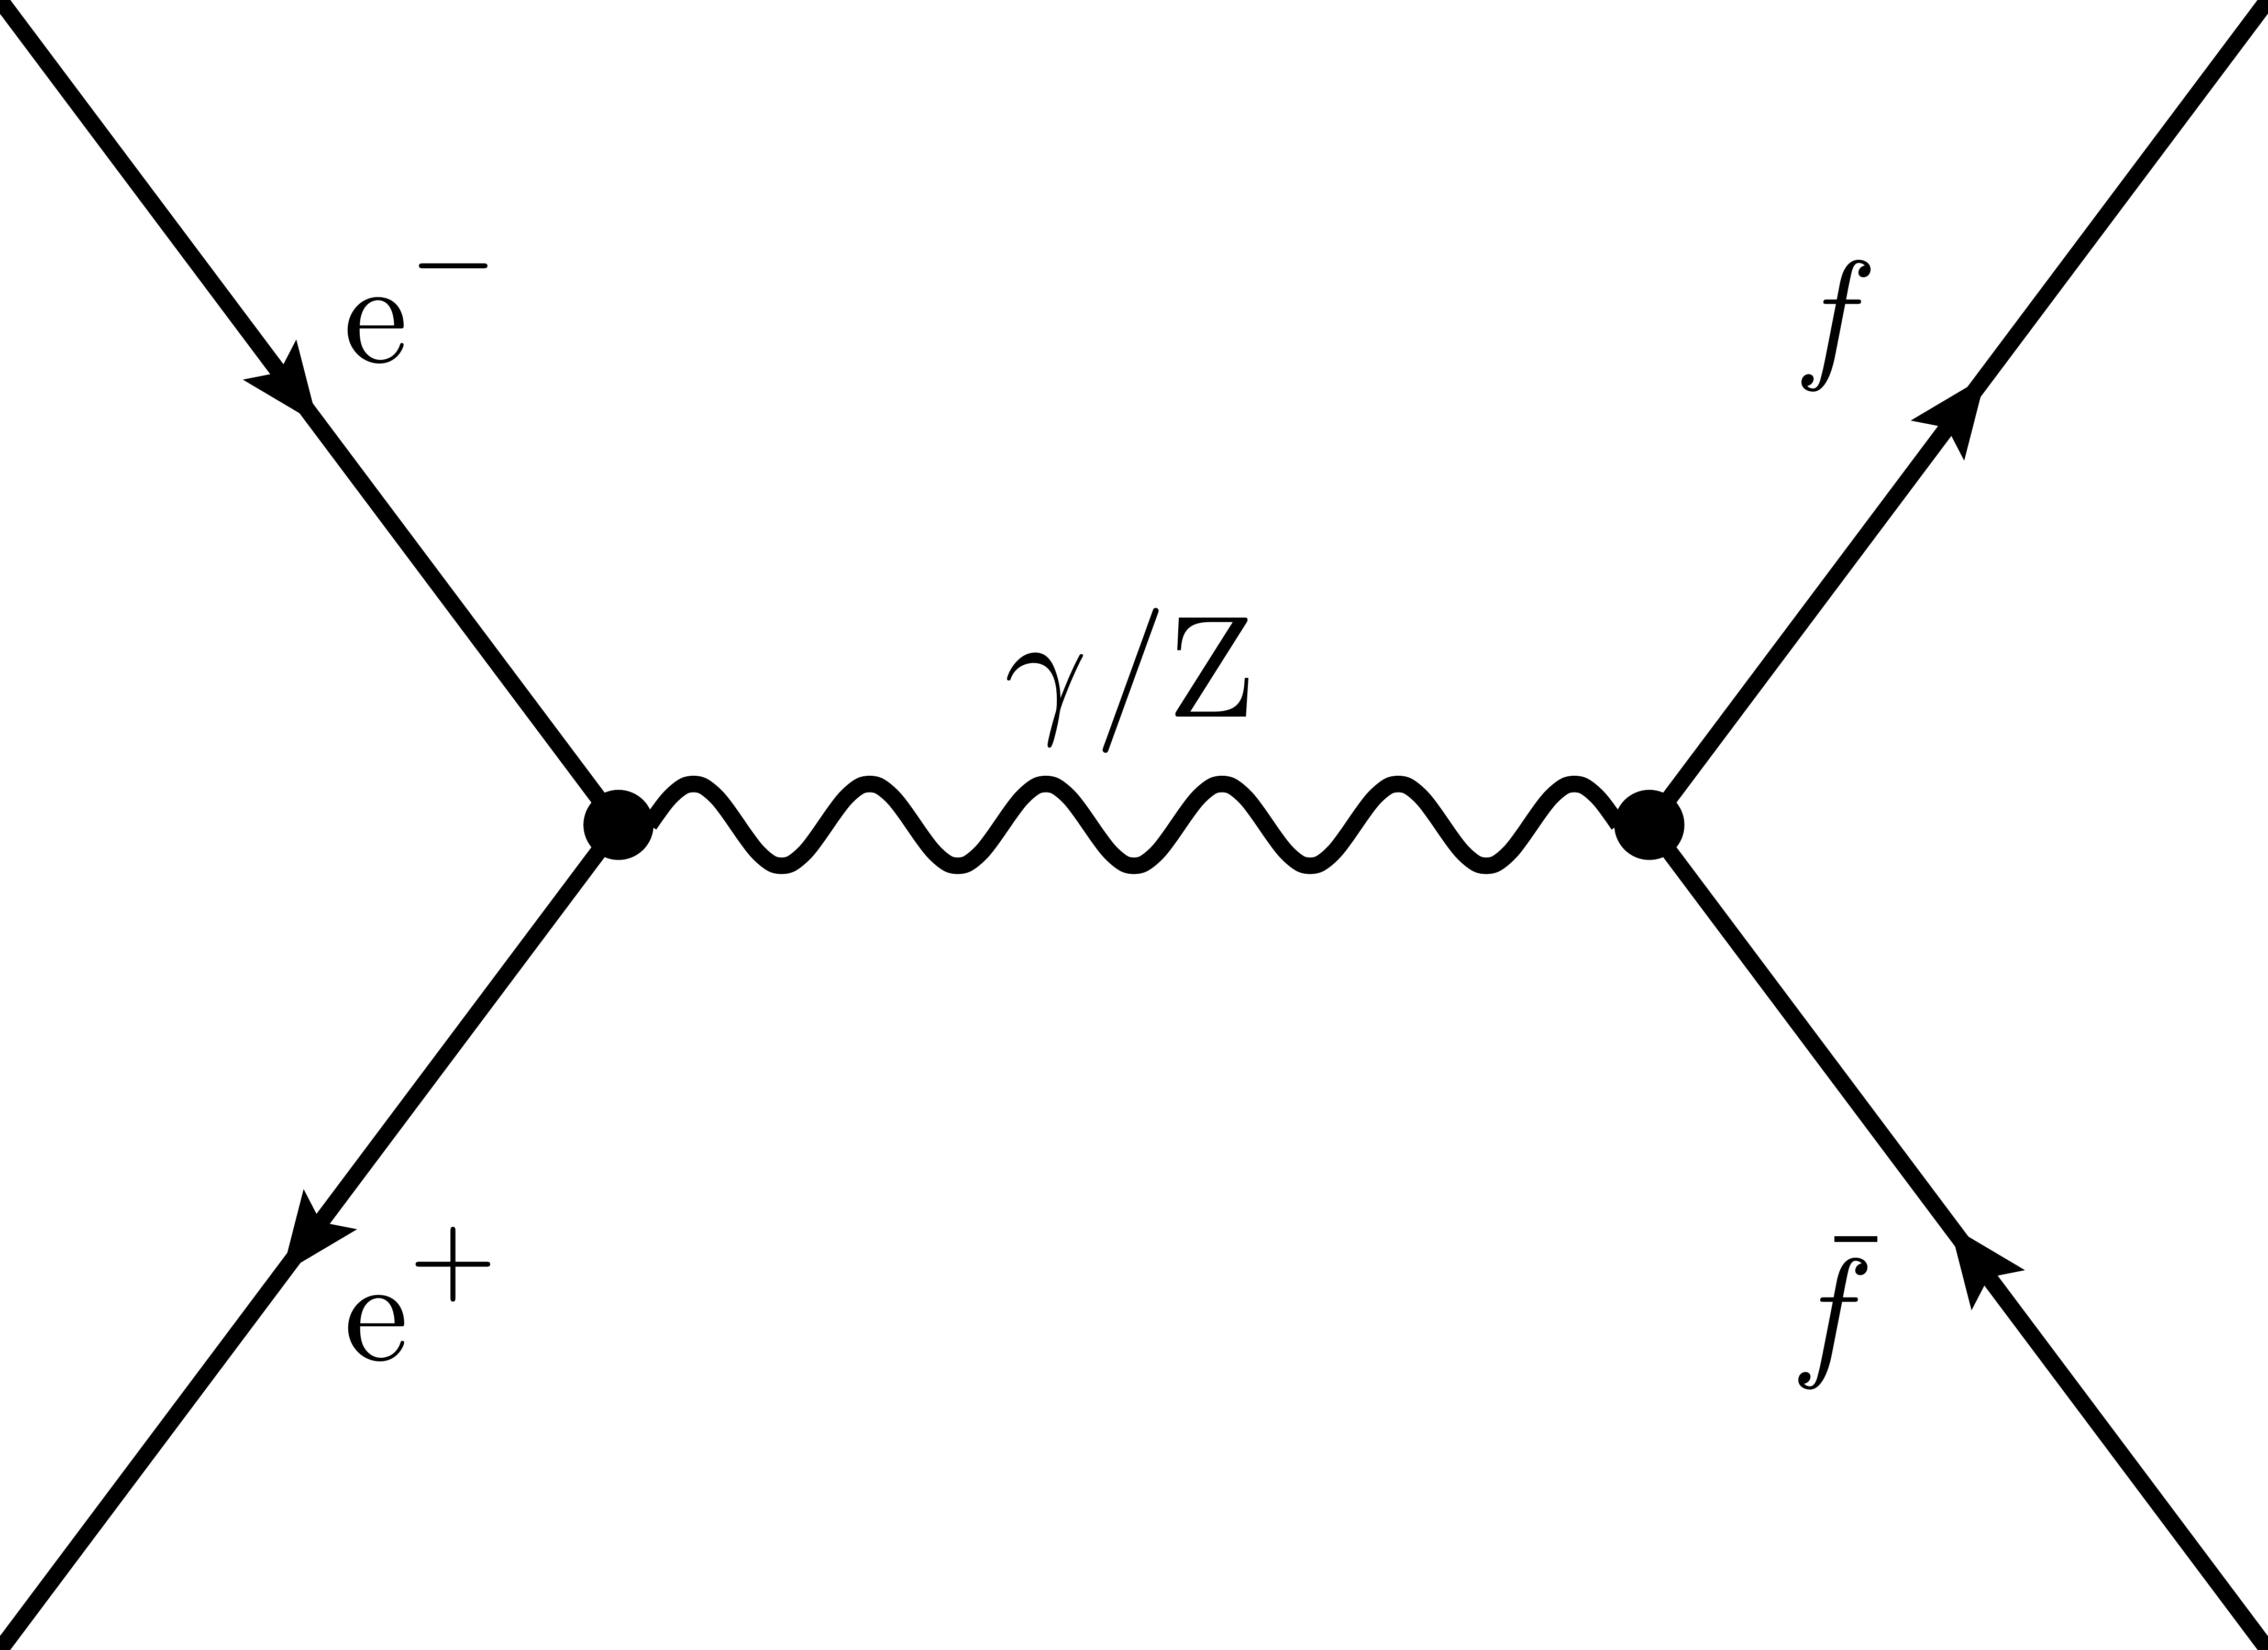

In [26]:
import pyx
from pyfeyn.user import *
from IPython.display import IFrame, display, Image
from pyx import *

filepath="Zproduction.pdf"
scale=1.0
gammaL = 1.25
osc_amplitude=0.10
osc_frequency=0.5

def setVector(*vectors):
    for vector in vectors:
        vector.setAmplitude(osc_amplitude)
        vector.setFrequency(osc_frequency)
    
def setLinewidth(*lines):
    for line in lines:
        line.addStyle(style.linewidth(0.04))    

fd = FeynDiagram()

in1 = Point(-(gammaL+1.5)*scale,  2*scale)
in2 = Point(-(gammaL+1.5)*scale, -2*scale)
out1 = Point((gammaL+1.5)*scale, -2*scale)
out2 = Point((gammaL+1.5)*scale,  2*scale)

in_vtx = Vertex(-gammaL*scale, 0, mark=CIRCLE)
out_vtx = Vertex(gammaL*scale, 0, mark=CIRCLE)

fa1 = Fermion(in1, in_vtx).addArrow().addLabel(r"\Pelectron")
fa2 = Fermion(in_vtx, in2).addArrow().addLabel(r"\Ppositron")
bos = Vector(in_vtx, out_vtx).addLabel(r"\Pphoton/\PZ")
fb1 = Fermion(out1, out_vtx).addArrow().addLabel(r"\Paf")
fb2 = Fermion(out_vtx, out2).addArrow().addLabel(r"\Pf")

setVector(bos)
setLinewidth(fa1, fa2, bos, fb1, fb2)

fd.draw(filepath)
show_pdf(filepath)

# $ee\rightarrow ZH$

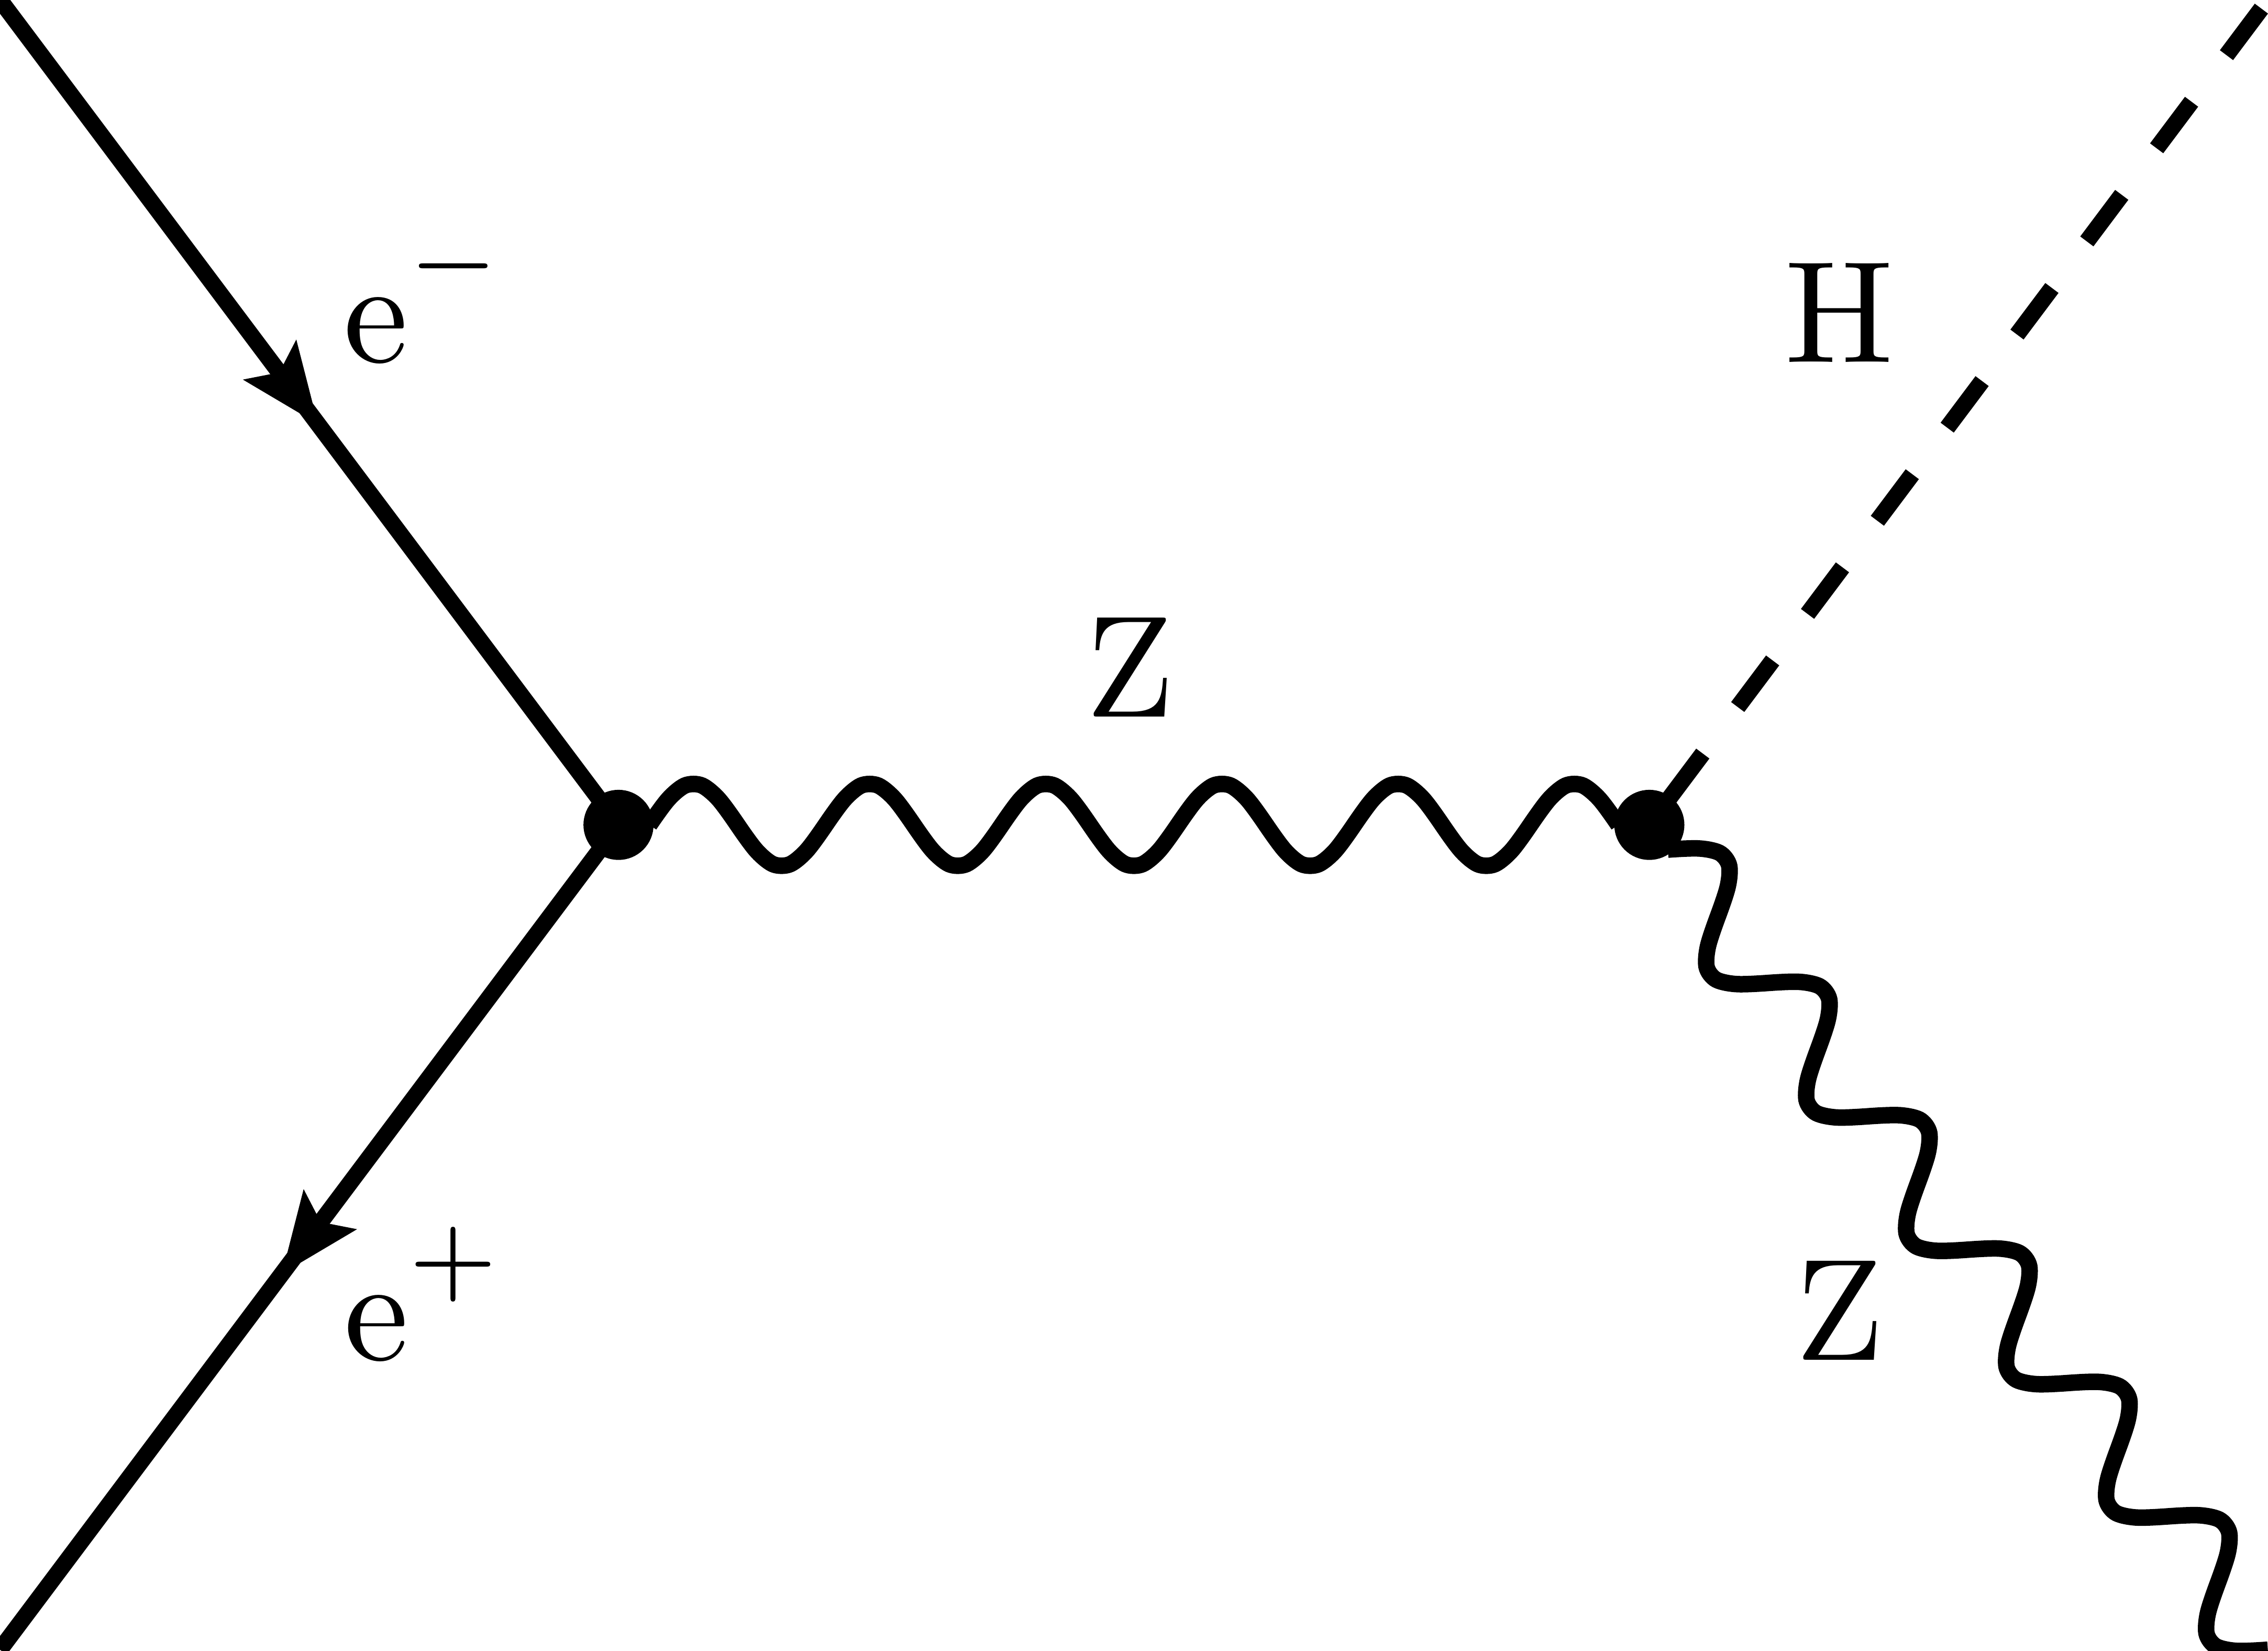

In [27]:
import pyx
from pyfeyn.user import *
from IPython.display import IFrame, display
from pyx import *

filepath = "ZH.pdf"
scale=1.0
gammaL = 1.25
osc_amplitude=0.10
osc_frequency=0.5

def setVector(*vectors):
    for vector in vectors:
        vector.setAmplitude(osc_amplitude)
        vector.setFrequency(osc_frequency)
    
def setLinewidth(*lines):
    for line in lines:
        line.addStyle(style.linewidth(0.04))    

fd = FeynDiagram()

in1 = Point(-(gammaL+1.5)*scale,  2*scale)
in2 = Point(-(gammaL+1.5)*scale, -2*scale)
out1 = Point((gammaL+1.5)*scale, -2*scale)
out2 = Point((gammaL+1.5)*scale,  2*scale)

in_vtx = Vertex(-gammaL*scale, 0, mark=CIRCLE)
out_vtx = Vertex(gammaL*scale, 0, mark=CIRCLE)

fa1 = Fermion(in1, in_vtx).addArrow().addLabel(r"\Pelectron")
fa2 = Fermion(in_vtx, in2).addArrow().addLabel(r"\Ppositron")
bos = Vector(in_vtx, out_vtx).addLabel(r"${\PZ}$")
fb1 = Vector(out1, out_vtx).addLabel(r"\PZ")
fb2 = Higgs(out_vtx, out2).addLabel(r"\PHiggs")

setVector(bos, fb1)
setLinewidth(fa1, fa2, bos, fb1, fb2)

fd.draw(filepath)
show_pdf(filepath)